# Pandas and Matplotlib Homework

In [3]:
#load the libraries using the normal convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##prevent plotting errors
%matplotlib inline

In [4]:
#Load our excel files of interest into pandas
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

C:\python\envs\python3.6\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


#Appendix:
 1. DF = Pandas DataFrame
 2. NHL_Goalies DF = NHL_Goalies 
 3. GAA_ DF = GAA_

### Q1A) Create a new DF (*called NHL_Ones*) by:
#### Filtering the correct DF for Goalies that played 1 game <font color='red'> (GP = Games played)</font>

Notes: How would you find the 'GP' column in these files?

In [5]:
#Answer 1A:
NHL_Ones=NHL_Goalies.loc[NHL_Goalies['GP']==1]
NHL_Ones['GP']

1     1
13    1
14    1
16    1
22    1
27    1
29    1
32    1
42    1
50    1
67    1
80    1
87    1
89    1
90    1
Name: GP, dtype: int64

 ## Q1B) 
 #### A. Find the value of the minimum Salary for the entire dataset 
 #### B. Replace the missing values from the NHL_Ones DF with this
 #### C. Create a new DF after replacement by **adding** a column called  "Adjusted_Salary"
 #### D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

#### Notes:
1. Note where the minimum Salary value is coming & where you are going to assign it to
2. Read up on **replacement** of missing values
3. Look up Numpy definition for null
4. Look up Pandas **Series** Naming 
5. Review concat function in Pandas
6. Review how to slice columns

In [6]:
#Answer 1B:
minSal=NHL_Goalies['Salary'].replace('$','').min()
NHL_Ones['Adjusted_Salary'] = NHL_Ones['Salary'].fillna(minSal)
NHL_Ones[['Salary','Adjusted_Salary']]

C:\python\envs\python3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Salary,Adjusted_Salary
1,NaN,575000.0
13,NaN,575000.0
14,575000.0,575000.0
16,708750.0,708750.0
22,780000.0,780000.0
27,650000.0,650000.0
29,925000.0,925000.0
32,NaN,575000.0
42,575000.0,575000.0
50,673334.0,673334.0


### Q2) A. Subset the NHL goalies data to include Goalies that played in more than 25 games AND have a GAA lower than 3.00 and store the New DF as 'workhorse'


Notes: 
1. Review notes creating "boolean" masks
2. Internet search for Multiple Boolean indexing on multiple columns in a Pandas DataFrame

In [7]:
#Answer 2:
workhorse=NHL_Goalies.loc[(NHL_Goalies['GP']>25)&(NHL_Goalies['GAA']<3)]
workhorse[['GP','GAA']]

,GP,GAA
0,61,2.422245
2,66,2.668889
3,40,2.279830
5,39,2.498516
9,39,2.537550
10,63,2.055534
12,60,2.176366
15,41,2.478041
18,55,2.550151
19,32,2.380694


### Q3. Create 2 python functions that: 
<br> </br>
#### A. Creates/*Returns* a new DataFrame that displays the number of missing values in every column. 
#### This new DataFrame has one new column named "Missing" with the sum of the missing values from the columns

### Notes 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
** One Proposed method:**
1. Create a pandas series object from the sum of the nulls in every column
2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.

### Expected Output:
<img src='Missing_cols_expectedoutput.png'>

In [46]:
# Answer 3A: CODE HERE; Please comment each part
def Missing_Cols(df):
    Missing=pd.DataFrame(data=np.count_nonzero(pd.isnull(df),axis=0),index=df.columns,columns=['Missing'])
    return Missing

Missing_Cols(NHL_Goalies)

#pd.isnull pull out nan from the dataframe.np.isnan didn't work for not all values are float. 
#np.count_nonzero counts nan along axis=0. 
#pd.DataFrame make a dataframe from the ndarray, with index as columns of the DataFrame, columns as 'Missing'.

,Missing
Last Name,0
First Name,0
Team,0
DOB,0
Birth City,0
S/P,34
Cntry,0
Nat,0
Ht,0
Wt,0


#### B. Creates a new *column* called 'missing_values' in the input DF that sums the missing values in each row.

### Notes: 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
Check out how to use axis argument and how to create new columns in an existing dataframe

### Expected Output:
<img src= 'missingrows_expectedoutput.png'>

In [4]:
#Answer 3B here; Please comment each part
def Missing_Rows(df):
    df['Missing']=np.count_nonzero(pd.isnull(df),axis=1)
    return df

Missing_Rows(NHL_Goalies)

#pd.isnull pull out nan from the dataframe.np.isnan didn't work for not all values are float. 
#np.count_nonzero counts nan along axis=1. 
#assign this ndarray to a new column in the df as 'Missing'. needs to check if 'Missing' already exist in the df.

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP,Missing
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,,3
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,,18
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951,2
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439,1
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,,3
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829,1
6,Berra,Reto,FLA,1987-01-03,Bulach,NaN,CHE,CHE,76,210,...,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,,8
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,,3
8,Bibeau,Antoine,TOR,1994-05-01,Victoriaville,QC,CAN,CAN,75,210,...,130.294240,NaN,NaN,NaN,NaN,0.4,NaN,NaN,,7
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049,0


### Q4) Matplotlib Question Plot in one figure and 2 side by side plots:
<br> </br>
#### A. Plot the histogram of the all the GAA of the NHL_Goalies DF  AND the goalies that played in more than 25 games with a GAA < 3.00, 
#### B. Label the Titles of the plots differently (*ie EntireSet + Subset*)
#### C. Change the color of one of the plots from the default

# Notes

1. convert your column of interest into a NumPY array (look up online for usage)
2. Review: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

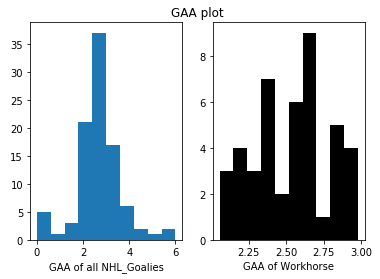

In [30]:
#Answer 4 here: please comment
fig=plt.figure()#generate a plot as fig

#use a big plot to set common title and turn of grids of the big plot
ax=fig.add_subplot(111)
plt.title('GAA plot')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#plot GAA of all
fig.add_subplot(1, 2, 1)
plt.hist(NHL_Goalies['GAA'])
plt.xlabel('GAA of all NHL_Goalies')

#plot GAA of workhorse in black
fig.add_subplot(1, 2, 2)
plt.hist(workhorse['GAA'], color='black')
plt.xlabel('GAA of Workhorse')

plt.show()#show plot

### Q5) GroupBy Question
##### 1. Subset the NHL_Goalies DataFrame where Injuries is not known <font color='red'>(Injuries=NaN)</font>; 
##### 2. Use a Merge with the GAA_  DF to produce a NEW DF (*called mergedDF*) 
###### *** USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS***
###### *** USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS***
##### 3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
##### 4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
#### 5. Create a dataframe of the <font color='red'>TOI </font>groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

## Notes:

1. Review or read up pandas documentation on:
    - how to create selection criteria
    - how aggs/joins work: https://pandas.pydata.org/pandas-docs/stable/merging.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
3. https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.get.html

In [136]:
#Answer 5 here: please comment
mergedDF=pd.merge(GAA_,
                  NHL_Goalies.loc[pd.isnull(NHL_Goalies['Injuries'])], 
                  sort=False, 
                  how='inner',
                  left_index= True, 
                  right_index= True)
#merge GAA_ with NHL_Goalies that has nan in Injuries, preserves order, uses intersection of keys, uses both left and right index

mergedDF.head()#mergedDF has two Fist Name, Last Name, Team, SV%, GA, GAA columes

,First Name_x,Last Name_x,Team_x,TOI,GAA_x,GSAA_x,SV%_x,TrueSV%_x,ExpSV%_x,xGSAA_x,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
0,Allen,Jake,STL,2692.83,2.139014,1.718026,0.924588,0.959630,0.923551,1.32,...,2350000.0,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,
1,Alves,Jorge,CAR,0.13,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,
4,Bachman,Richard,VAN,244.84,2.695638,-0.330082,0.920863,0.958015,0.907626,1.84,...,575000.0,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,
6,Berra,Reto,FLA,248.43,3.381234,-5.095608,0.879310,0.936364,0.901034,-2.52,...,1450000.0,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,
7,Berube,Jean-Francois,NYI,444.72,3.103076,-5.037692,0.901709,0.942211,0.925726,-5.62,...,675000.0,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,


In [168]:
#mergedDF['First Name_x'] gives error

data=mergedDF.values#convert to ndarray
data2={'First Name_x':[],'Last Name_x':[], 'Team_x':[], 'Cntry':[], 'SV%_x':[], 'GA_x':[],'GAA_x':[], 'TOI':[]}
#initialize an empty dict with columns we want as keys
for col in ['First Name_x', 'Last Name_x', 'Team_x', 'Cntry', 'SV%_x', 'GA_x','GAA_x','TOI']:
    data2[col]=list(data[:,mergedDF.columns==col].ravel())
#find column keys as the columns we want, take only x for repeated columns
#take these columns from ndarray, store them in the dict as list
mergedDF2=pd.DataFrame.from_dict(data2)#generate a new dateframe from the dict
#looks like not the best way to do this, but the only way I think of...

mergedDF2.head()

,First Name_x,Last Name_x,Team_x,Cntry,SV%_x,GA_x,GAA_x,TOI
0,Allen,Jake,STL,CAN,0.924588,96,2.139014,2692.83
1,Alves,Jorge,CAR,USA,0.000000,0,0.000000,0.13
2,Bachman,Richard,VAN,USA,0.920863,11,2.695638,244.84
3,Berra,Reto,FLA,CHE,0.879310,14,3.381234,248.43
4,Berube,Jean-Francois,NYI,CAN,0.901709,23,3.103076,444.72


In [169]:
gbCntry=mergedDF2.groupby(['Cntry'])#groupby Cntry

gbCntry.mean()#mean

,SV%_x,GA_x,GAA_x,TOI
Cntry,,,,
CAN,0.908457,44.160000,2.717212,1147.538400
CHE,0.879310,14.000000,3.381234,248.430000
CZE,0.945585,25.500000,1.522106,594.537500
DEU,0.930367,59.500000,2.025291,1628.095000
FIN,0.917193,55.000000,2.485414,1377.347500
LVA,1.000000,0.000000,0.000000,11.450000
RUS,0.923759,86.000000,2.335254,2209.610000
SVK,0.921984,68.500000,2.257327,1927.335000
SWE,0.896986,6.000000,3.163009,95.775000


In [170]:
gbCntry.min()#min

,First Name_x,Last Name_x,Team_x,SV%_x,GA_x,GAA_x,TOI
Cntry,,,,,,,
CAN,Allen,Aaron,ANA,0.714286,0,0.000000,6.97
CHE,Berra,Reto,FLA,0.879310,14,3.381234,248.43
CZE,Langhamer,David,ARI,0.865672,0,0.000000,7.39
DEU,Greiss,Philipp,NYI,0.920918,26,1.612686,967.33
FIN,Korpisalo,Antti,CBJ,0.907975,30,2.179960,646.87
LVA,Gudlevskis,Kristers,TBL,1.000000,0,0.000000,11.45
RUS,Vasilevskiy,Andrei,TBL,0.923759,86,2.335254,2209.61
SVK,Budaj,Jaroslav,"LAK, TBL",0.918675,54,1.906169,1242.10
SWE,Enroth,Anton,BUF,0.853448,2,1.607286,47.10


In [171]:
gbCntry.max()#max

,First Name_x,Last Name_x,Team_x,SV%_x,GA_x,GAA_x,TOI
Cntry,,,,,,,
CAN,Ward,Tristan,WSH,1.000000,126,7.402838,3417.26
CHE,Berra,Reto,FLA,0.879310,14,3.381234,248.43
CZE,Rittich,Petr,NSH,1.000000,93,3.552164,2200.09
DEU,Grubauer,Thomas,WSH,0.939815,93,2.437895,2288.86
FIN,Saros,Kari,NSH,0.926978,93,2.782630,2559.68
LVA,Gudlevskis,Kristers,TBL,1.000000,0,0.000000,11.45
RUS,Vasilevskiy,Andrei,TBL,0.923759,86,2.335254,2209.61
SVK,Halak,Peter,NYI,0.925293,83,2.608486,2612.57
SWE,Ullmark,Magnus,TOR,0.928571,17,4.829317,211.21


In [181]:
gbTOI=mergedDF2.groupby(['TOI'])
len(gbTOI)

58

In [182]:
gbTOI=mergedDF2.set_index(['TOI'])#this gives same result as groupby, but type is dataframe
len(gbTOI)

58

In [183]:
gbTOI.to_csv(path_or_buf='TOI_2017.csv',sep=',')

# Q6) Write a function(s)  
## that subsets a dataframe by removing rows that are WITHIN the InterQuartile Region of a specified column
<br> </br>
### The function takes as input 
##### A: Pandas_Dataframe (For example use NHL_GoaliesDF)
##### B. Column name
### Add a condition that returns an error if the Column Name chosen is not:
##### A. Numeric Dtype
##### B. Does not exist in the Numeric Columns
### The output is a DataFrame that removes rows outside of the specified columns IQR
<br> </br>
<font color='red'>**You can use smaller helper functions **<font>
<br> </br>
See --> <href>=https://en.wikipedia.org/wiki/Interquartile_range</href>
#hint: There are several pandas subfunctions that can be useful

In [213]:
#Answer Question 6 here
#define a function to check if numeric
def exception(df, col):
    numeric= True
    for num in df[col]:
        if not str(num).isnumeric:
            numeric= False
    return numeric

def SubsetIQR (df, col):
    #exception handling
    try:
        df[col]  
        exception(df,col)          
    except:
        print('Error')
        return np.nan
    #calculate percentile
    p25=np.nanpercentile(df[col],25)
    p75=np.nanpercentile(df[col],75)
    #subset df
    setIQR=df.loc[df[col]<p75]
    setIQR=setIQR.loc[setIQR[col]>p25]
    #print(p25, p75)
    return setIQR
    
SubsetIQR(NHL_Goalies, '1st')

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,4150000.0,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829
12,Budaj,Peter,"LAK, TBL",1982-09-18,Banská Bystrica,NaN,SVK,SVK,73,196,...,600000.0,108.110995,4.0,7.0,4.0,15.0,8.6,NaN,NaN,
19,Darling,Scott,CHI,1988-12-22,Newport News,VA,USA,USA,78,232,...,587500.0,109.476386,5.0,5.0,5.0,15.0,6.2,5.0,Upper body,35823.2
20,Dell,Aaron,SJS,1989-05-04,Airdrie,AB,CAN,CAN,72,205,...,625000.0,114.105623,3.0,3.0,2.0,8.0,4.2,NaN,NaN,
21,Domingue,Louis,ARI,1992-03-06,St-Hyacinthe,QC,CAN,CAN,75,210,...,1050000.0,113.230679,3.0,0.0,2.0,5.0,4.6,6.0,"Lower body, Lower body",76829.3
24,Elliott,Brian,CGY,1985-04-09,Newmarket,ON,CAN,CAN,74,209,...,2500000.0,108.444028,6.0,7.0,5.0,18.0,7.3,1.0,Illness,30487.8
26,Fleury,Marc-Andre,PIT,1984-11-28,Sorel,QC,CAN,CAN,74,180,...,5750000.0,117.360311,5.0,3.0,3.0,11.0,6.4,NaN,NaN,
30,Greiss,Thomas,NYI,1986-01-29,Fussen,NaN,DEU,DEU,73,228,...,1500000.0,115.658454,2.0,6.0,6.0,14.0,8.6,NaN,NaN,
31,Grubauer,Philipp,WSH,1991-11-25,Rosenheim,NaN,DEU,DEU,73,182,...,750000.0,106.281467,6.0,1.0,0.0,7.0,4.4,NaN,NaN,
34,Halak,Jaroslav,NYI,1985-05-13,Bratislava,NaN,SVK,SVK,71,181,...,4500000.0,116.862004,4.0,1.0,1.0,6.0,5.4,NaN,NaN,
